In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 7)

import scipy
from scipy.stats import ttest_ind

In [6]:
df = pd.read_csv("F:/datascientist/DATA/car_purchasing.csv",encoding='latin-1')

In [7]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [9]:
# Checking for Null values

In [11]:
df.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

### No null values in dataset

 df.nunique()

In [16]:
#Removing customer name, customer e-mail from datset
df = df.drop(["customer name","customer e-mail"],axis=1)

### Understanding the Variables

In [17]:
df

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [20]:
kd = df.groupby("country")["car purchase amount"]

In [28]:
kd.mean()

country
Afghanistan       56017.850725
Algeria           47752.068330
American Samoa    24221.999370
Andorra           39239.699943
Angola            44498.000075
                      ...     
Western Sahara    44318.569955
Yemen             52960.391330
Zimbabwe          34602.865580
marlal            45107.225660
Åland Islands     51012.696863
Name: car purchase amount, Length: 211, dtype: float64

(array([  2.,   6.,  30.,  66., 120., 111.,  89.,  53.,  20.,   3.]),
 array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.]),
 <BarContainer object of 10 artists>)

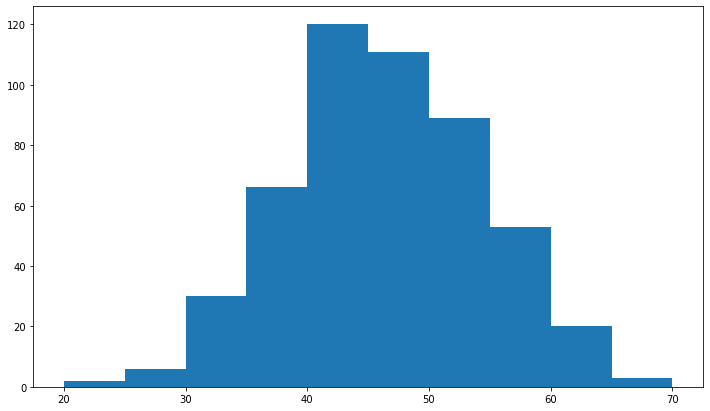

In [38]:
plt.hist(df.age, 10)

In [42]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


(array([1.35211268e-06, 1.35211268e-06, 4.39436620e-06, 1.82535211e-05,
        2.40000000e-05, 3.85352113e-05, 3.54929577e-05, 2.26478873e-05,
        1.45352113e-05, 6.42253521e-06, 1.69014085e-06, 3.38028169e-07]),
 array([ 9000.        , 14916.66666667, 20833.33333333, 26750.        ,
        32666.66666667, 38583.33333333, 44500.        , 50416.66666667,
        56333.33333333, 62250.        , 68166.66666667, 74083.33333333,
        80000.        ]),
 <BarContainer object of 12 artists>)

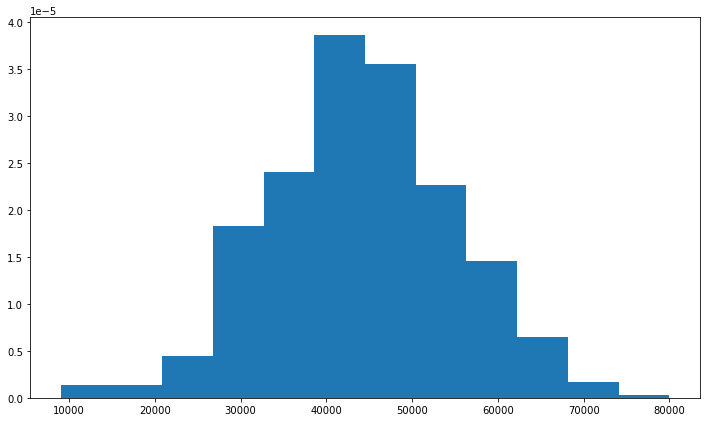

In [43]:
plt.hist(df["car purchase amount"], 12,density=True)

(array([ 12.,  43.,  78., 106.,  90.,  89.,  53.,  20.,   8.,   1.]),
 array([  20000.,  118000.,  216000.,  314000.,  412000.,  510000.,
         608000.,  706000.,  804000.,  902000., 1000000.]),
 <BarContainer object of 10 artists>)

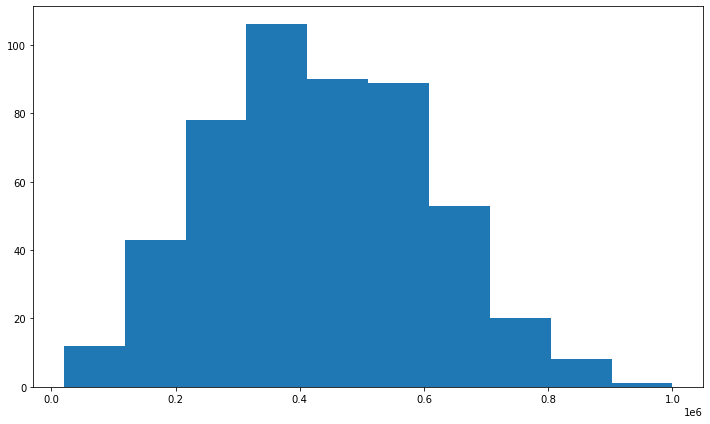

In [45]:
plt.hist(df["net worth"])

Text(0, 0.5, 'car purchase amount')

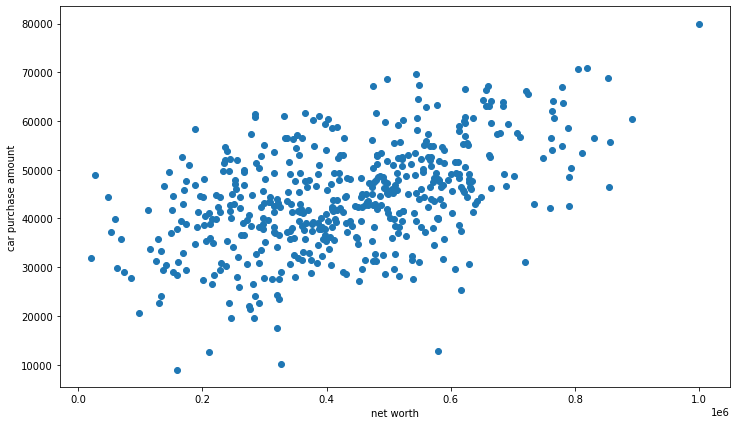

In [47]:
plt.scatter(df["net worth"],df["car purchase amount"])
plt.xlabel("net worth")
plt.ylabel("car purchase amount")

Text(0, 0.5, 'car purchase amount')

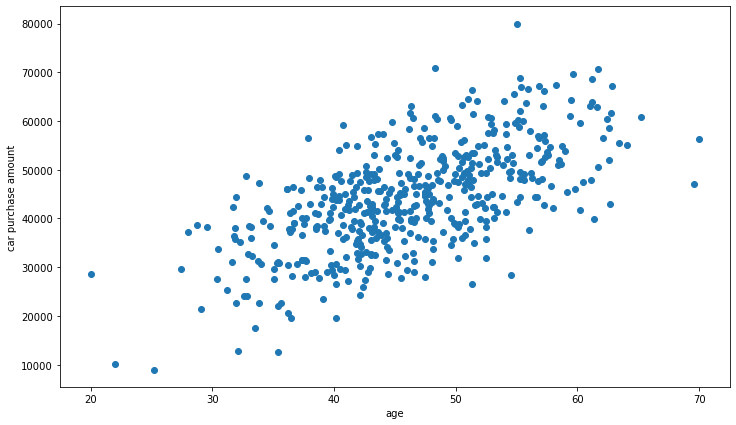

In [48]:
plt.scatter(df["age"],df["car purchase amount"])
plt.xlabel("age")
plt.ylabel("car purchase amount")

In [50]:
df.corr()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
credit card debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
net worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
car purchase amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


In [53]:
df.nunique()

country                211
gender                   2
age                    500
annual Salary          500
credit card debt       500
net worth              500
car purchase amount    500
dtype: int64

### Annual Salary,net worth has co_relation with car purchase amount

In [51]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2, chi2_contingency
import scipy

In [56]:
df.rename(columns={"car purchase amount":"purchase_amount"},inplace=True)

### Checking P values

In [57]:
base = ols("purchase_amount  ~ country  ", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
country,210.0,2.658367e+10,1.265889e+08,1.167669,0.111479
Residual,289.0,3.133096e+10,1.084116e+08,NaN,NaN


In [58]:
base = ols("purchase_amount  ~ gender", data = df).fit()
sm.stats.anova_lm(base)

,df,sum_sq,mean_sq,F,PR(>F)
gender,1.0,2.554010e+08,2.554010e+08,2.205887,0.138118
Residual,498.0,5.765923e+10,1.157816e+08,NaN,NaN


### Both category variables does not have much impact on target variable

### Checking for outliears

<AxesSubplot:xlabel='age'>

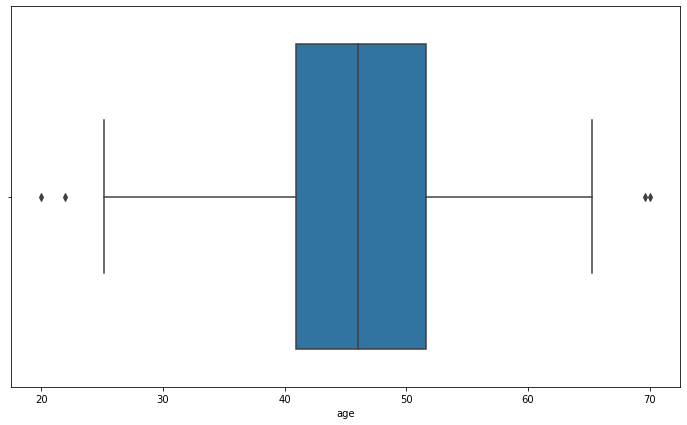

In [61]:
import seaborn as sns
sns.boxplot(df.age)

In [64]:
IQR = df.age.quantile(0.75)-df.age.quantile(0.25)
upper_limit = df.age.quantile(0.75) + (1.5*IQR)
lower_limit = df.age.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

67.60570433625 24.956527026250004


In [65]:
df["age"] = np.where(df["age"] > upper_limit,upper_limit,df["age"])
df["age"]  = np.where(df["age"] < lower_limit,lower_limit,df["age"])

<AxesSubplot:xlabel='age'>

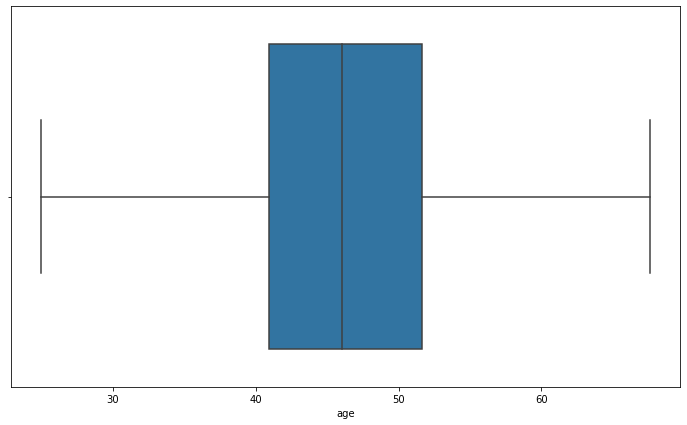

In [66]:
import seaborn as sns
sns.boxplot(df.age)

<AxesSubplot:xlabel='annual Salary'>

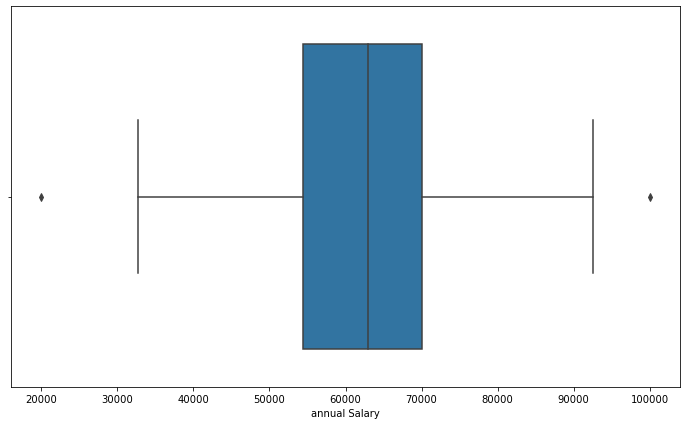

In [69]:
sns.boxplot(df["annual Salary"])

In [72]:
df.nunique()

country             211
gender                2
age                 498
annual Salary       500
credit card debt    500
net worth           500
purchase_amount     500
dtype: int64

In [74]:
IQR = df["annual Salary"].quantile(0.75)-df["annual Salary"].quantile(0.25)
upper_limit = df["annual Salary"].quantile(0.75) + (1.5*IQR)
lower_limit = df["annual Salary"].quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )
df["annual Salary"] = np.where(df["annual Salary"] > upper_limit,upper_limit,df["annual Salary"])
df["annual Salary"]  = np.where(df["annual Salary"] < lower_limit,lower_limit,df["annual Salary"])

93706.68922 30803.149979999995


<AxesSubplot:xlabel='annual Salary'>

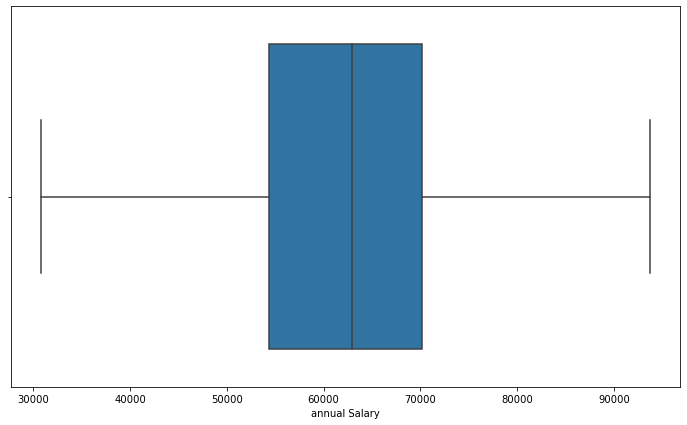

In [75]:
sns.boxplot(df["annual Salary"])

In [76]:
df

,country,gender,age,annual Salary,credit card debt,net worth,purchase_amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


<AxesSubplot:xlabel='net worth'>

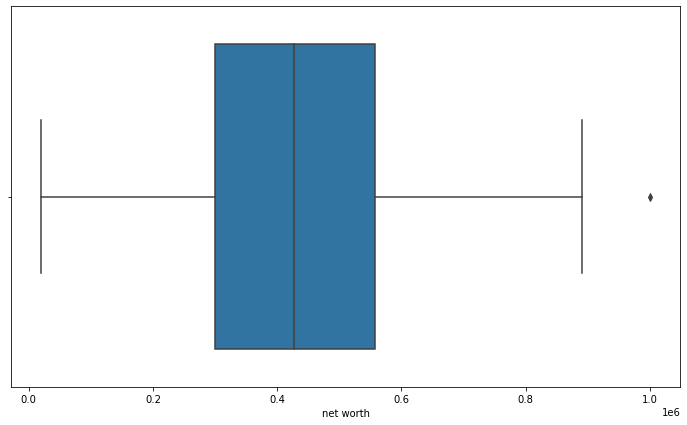

In [78]:
sns.boxplot(df["net worth"])

In [84]:
IQR = df["net worth"].quantile(0.75)-df["net worth"].quantile(0.25)
upper_limit = df["net worth"].quantile(0.75) + (1.5*IQR)
lower_limit = df["net worth"].quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

943574.9029625 -86426.22833749995


In [85]:
df["net worth"] = np.where(df["net worth"] > upper_limit,upper_limit,df["net worth"])
df["net worth"]  = np.where(df["net worth"] < lower_limit,lower_limit,df["net worth"])

<AxesSubplot:xlabel='net worth'>

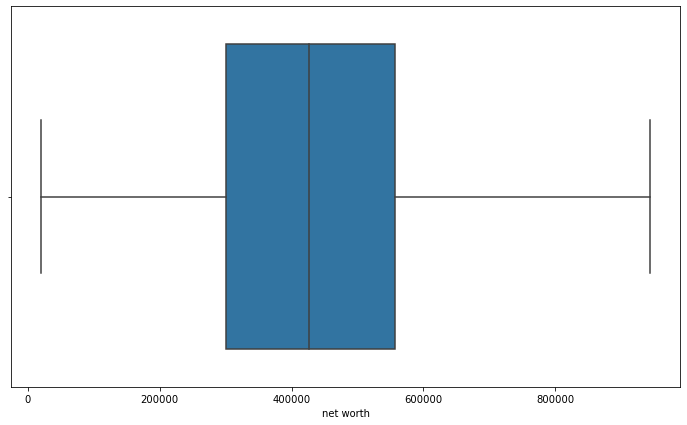

In [86]:
sns.boxplot(df["net worth"])

### Removed all outliears 

In [88]:
df=df.drop(["country","gender"], axis=1)

In [89]:
df

,age,annual Salary,credit card debt,net worth,purchase_amount
0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...
495,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


###  Standardize the data using the anyone of the scalers provided by sklearn

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [92]:
M_Scaler = MinMaxScaler()
Columns = df.columns

In [94]:
df=M_Scaler.fit_transform(df)

In [95]:
df

array([[0.39614346, 0.50885758, 0.57836085, 0.23708012, 0.37072477],
       [0.37313959, 0.56982077, 0.476028  , 0.5532566 , 0.50866938],
       [0.42665232, 0.36556609, 0.55579674, 0.66964485, 0.47782689],
       ...,
       [0.67966071, 0.60546081, 0.52822145, 0.8061407 , 0.77672238],
       [0.80198456, 0.30219032, 0.69914746, 0.34412654, 0.51326977],
       [0.51055206, 0.48594289, 0.46690159, 0.47959997, 0.50855247]])

In [97]:
df = pd.DataFrame(df, columns=Columns)

In [98]:
df

,age,annual Salary,credit card debt,net worth,purchase_amount
0,0.396143,0.508858,0.578361,0.237080,0.370725
1,0.373140,0.569821,0.476028,0.553257,0.508669
2,0.426652,0.365566,0.555797,0.669645,0.477827
3,0.781137,0.772085,0.719908,0.572340,0.822850
4,0.758683,0.459847,0.264257,0.585014,0.660781
...,...,...,...,...,...
495,0.387018,0.654005,0.346528,0.564838,0.561992
496,0.297438,0.401191,0.613139,0.368589,0.316780
497,0.679661,0.605461,0.528221,0.806141,0.776722
498,0.801985,0.302190,0.699147,0.344127,0.513270


# Building Model

In [100]:
x = df.drop(["purchase_amount"],axis=1)
y = df.purchase_amount

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.75)

In [110]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True,n_jobs=200)
lm.fit(X_train,y_train)
print("Coefficient", lm.coef_ , "intercept", lm.intercept_)
print("The R_square is: ", round(lm.score (X_test,y_test),3))

Coefficient [ 0.51009005  0.50261271 -0.00058444  0.37423136] intercept -0.1753739953025687
The R_square is:  0.998


In [111]:
accuracy=lm.score(X_test,y_test)
accuracy_train=lm.score(X_train,y_train)
print(accuracy,accuracy_train)

0.9984369692854196 0.9987253580038244


In [117]:
y_pre=lm.predict(X_test)

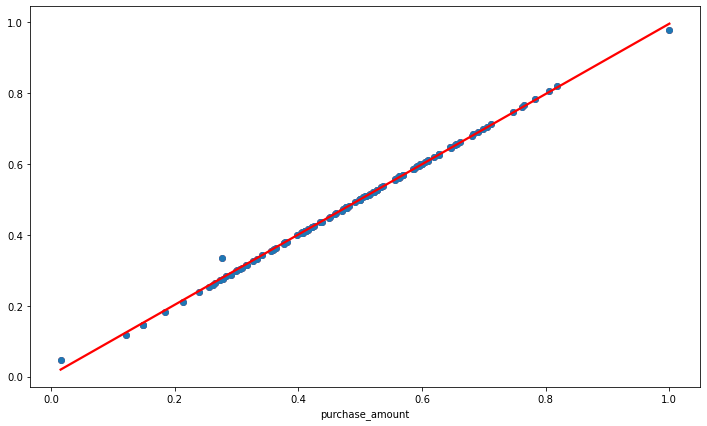

In [118]:
sns.regplot(x=y_test,y=y_pre,ci=None,color='r')
plt.scatter(y_test,y_pre)
plt.show()

### Decission Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
accuracy=DecisionTree_model.score(X_test,y_test)
accuracy_train=DecisionTree_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.8596936623692539 1.0


In [120]:
y_pre=DecisionTree_model.predict(X_test)

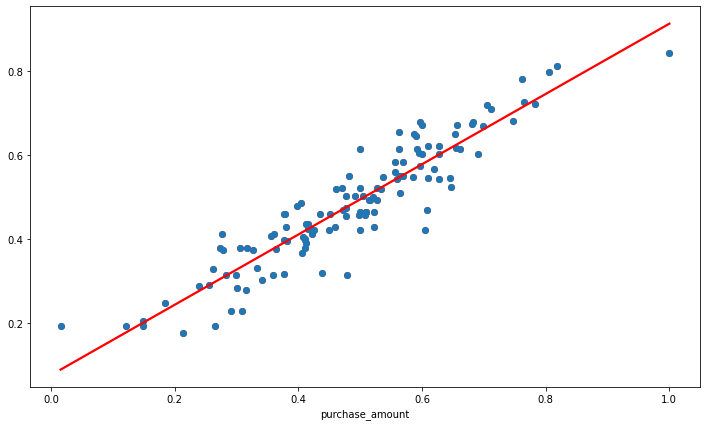

In [121]:
sns.regplot(x=y_test,y=y_pre,ci=None,color='r')
plt.scatter(y_test,y_pre)
plt.show()

### Random Forest

In [122]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model=RandomForestRegressor()
RandomForest_model.fit(X_train,y_train)
accuracy=RandomForest_model.score(X_test,y_test)
accuracy_train=DecisionTree_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.9475165483072304 1.0


In [123]:
y_pre=RandomForest_model.predict(X_test)

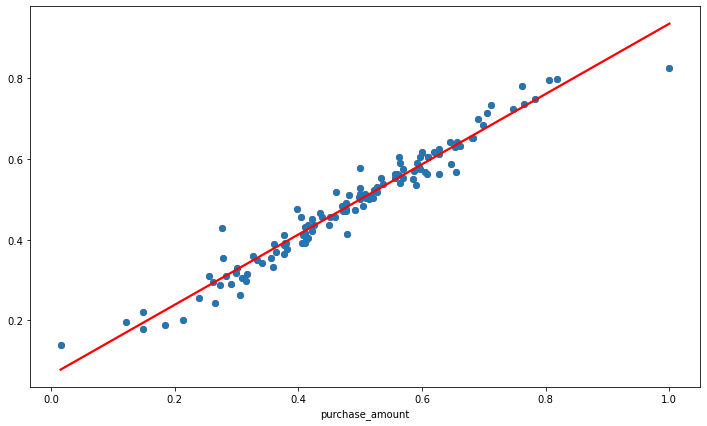

In [124]:
sns.regplot(x=y_test,y=y_pre,ci=None,color='r')
plt.scatter(y_test,y_pre)
plt.show()

# Out of all model linear regression gives as best accuracy of 98%

# End